## 패키지 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 데이터 로드

sickit-learn 라이브러리에 있는 데이터 셋을 사용한다

In [2]:
diabetes = datasets.load_diabetes()

## 데이터 탐색

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

feature는 age, sex, bmi, bp, s1~s6이다. 이것을 인풋 X로 두고 타겟은 Y으로 둔다

In [4]:
diabetes_X = diabetes.data
diabetes_X.shape

(442, 10)

X 데이터 중 bmi 데이터만으로 예측해보자. (사이킷런 튜토리얼 따라함)

In [8]:
diabetes_bmi = diabetes_X[:,np.newaxis, 2]
diabetes_bmi.shape

(442, 1)

In [5]:
diabetes_Y = diabetes.target
diabetes_Y.shape

(442,)

데이터 준비는 끝냈으므로, 학습용과 테스트용으로 데이터를 나누자

In [12]:
bmi_train = diabetes_bmi[:400]
target_train = diabetes_Y[:400]

bmi_test = diabetes_bmi[400:]
target_test = diabetes_Y[400:]

## 머신러닝 모델

선형 회귀 모델을 scikit-learn으로 간단하게 만들자

In [13]:
regr = linear_model.LinearRegression()

## 최적화

In [14]:
regr.fit(bmi_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 optimized coefficients를 확인해 볼 수 있다

In [15]:
regr.coef_

array([955.70303385])

## 정확성 예측
위에서 만들어 놓은 테스트용 데이터로 성능이 얼마나 나오는지 (얼마나 정확한지) 확인해보자.

그러기 위해 우선 테스트용 bmi 데이터로 Y를 예측한다.

In [18]:
# 예측
y_pred = regr.predict(bmi_test)
y_pred

array([196.51241167, 109.98667708, 121.31742804, 245.95568858,
       204.75295782, 270.67732703,  75.99442421, 241.8354155 ,
       104.83633574, 141.91879342, 126.46776938, 208.8732309 ,
       234.62493762, 152.21947611, 159.42995399, 161.49009053,
       229.47459628, 221.23405012, 129.55797419, 100.71606266,
       118.22722323, 168.70056841, 227.41445974, 115.13701842,
       163.55022706, 114.10695016, 120.28735977, 158.39988572,
       237.71514243, 121.31742804,  98.65592612, 123.37756458,
       205.78302609,  95.56572131, 154.27961264, 130.58804246,
        82.17483382, 171.79077322, 137.79852034, 137.79852034,
       190.33200206,  83.20490209])

실제 Y값과 얼마나 차이나는지 Mean Squere Error를 사용하여 체크한다.

In [19]:
mse_error = mean_squared_error(target_test, y_pred)
mse_error

3171.1118016053833

얼마나 맞췄는지 확인한다.

In [20]:
r2 = r2_score(target_test, y_pred)
r2

0.42720426706720194

시각화하여 선형 회귀 모델을 확인해보자

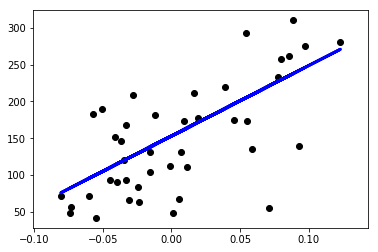

In [21]:
plt.scatter(bmi_test, target_test, color='black')
plt.plot(bmi_test, y_pred, color='blue', linewidth=3)
plt.show()

파란선은 우리가 예측한 값이고, 검정색 점은 실제 값들이다.